In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
# Access Data
import os

path = os.listdir('Data/Training/')
classes = {'Lilly':0, 'Lotus':1, 'Orchid':2, 'Sunflower':3, 'Tulip':4}

In [3]:
# Append data into array
import cv2
X = []
Y = []
for cls in classes:
    pth = 'Data/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1, 2, 3, 4])

In [6]:
pd.Series(Y).value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
dtype: int64

In [7]:
X.shape, X_updated.shape

((5000, 200, 200), (5000, 40000))

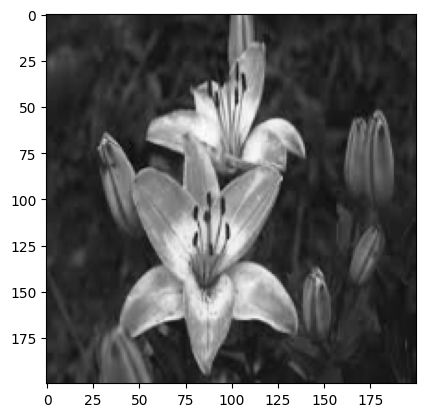

In [8]:
plt.imshow(X[0], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(5000, 40000)

In [10]:
# Splitting the data
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.30)

In [11]:
xtrain.shape, xtest.shape

((3500, 40000), (1500, 40000))

In [12]:
# Normalization of Pixel Values

print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
# Performing PCA

print(xtrain.shape, xtest.shape)

pca = PCA(.99)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
# pca_train = xtrain
# pca_test = xtest

(3500, 40000) (1500, 40000)


In [14]:
print(xtrain.shape, xtest.shape)
print(pca.n_components_)
print(pca.n_features_)

(3500, 1466) (1500, 1466)
1466
40000


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
# Importing Base Learners

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1, max_iter=1000)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1, max_iter=1000)

In [17]:
sv = SVC(kernel = 'linear', probability = True, C = 0.1)
sv.fit(xtrain, ytrain)

SVC(C=0.1, kernel='linear', probability=True)

In [18]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [19]:
rc = RandomForestClassifier(random_state=1)
rc.fit(xtrain, ytrain)

RandomForestClassifier(random_state=1)

In [20]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.9742857142857143
Testing Score: 0.64


In [21]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.998
Testing Score: 0.66


In [22]:
print("Training Score:", dt.score(xtrain, ytrain))
print("Testing Score:", dt.score(xtest, ytest))

Training Score: 0.9991428571428571
Testing Score: 0.5733333333333334


In [23]:
print("Training Score:", rc.score(xtrain, ytrain))
print("Testing Score:", rc.score(xtest, ytest))

Training Score: 0.9991428571428571
Testing Score: 0.6666666666666666


In [24]:
from sklearn.ensemble import VotingClassifier

In [25]:
classifiers = [('lg',lg),('dt',dt),('sv',sv),('rc',rc)]

In [26]:
vch = VotingClassifier(estimators = classifiers, voting = 'hard')

In [27]:
vcs = VotingClassifier(estimators = classifiers, voting = 'soft')

In [28]:
vch.fit(xtrain, ytrain)

VotingClassifier(estimators=[('lg', LogisticRegression(C=0.1, max_iter=1000)),
                             ('dt', DecisionTreeClassifier(random_state=1)),
                             ('sv',
                              SVC(C=0.1, kernel='linear', probability=True)),
                             ('rc', RandomForestClassifier(random_state=1))])

In [29]:
vcs.fit(xtrain, ytrain)

VotingClassifier(estimators=[('lg', LogisticRegression(C=0.1, max_iter=1000)),
                             ('dt', DecisionTreeClassifier(random_state=1)),
                             ('sv',
                              SVC(C=0.1, kernel='linear', probability=True)),
                             ('rc', RandomForestClassifier(random_state=1))],
                 voting='soft')

In [30]:
print("Training Score:", vcs.score(xtrain, ytrain))
print("Testing Score:", vcs.score(xtest, ytest))

Training Score: 0.9991428571428571
Testing Score: 0.638


In [31]:
print("Training Score:", vch.score(xtrain, ytrain))
print("Testing Score:", vch.score(xtest, ytest))

Training Score: 0.9988571428571429
Testing Score: 0.6713333333333333


In [32]:
pred = vch.predict(xtest)

In [33]:
misclassified=np.where(ytest!=pred)
misclassified

(array([   2,    3,    5,    7,   11,   13,   17,   19,   26,   30,   32,
          34,   40,   52,   53,   54,   56,   58,   59,   65,   68,   71,
          74,   75,   76,   77,   80,   82,   86,   90,   93,   94,   97,
         102,  106,  108,  110,  111,  112,  115,  116,  123,  126,  129,
         130,  131,  133,  138,  141,  144,  146,  148,  150,  151,  152,
         153,  164,  165,  166,  167,  173,  174,  176,  182,  183,  186,
         193,  207,  212,  215,  222,  224,  227,  228,  229,  230,  232,
         233,  241,  246,  250,  253,  258,  264,  270,  271,  280,  286,
         291,  299,  301,  304,  309,  310,  313,  321,  322,  323,  324,
         327,  332,  336,  337,  340,  341,  343,  344,  351,  352,  353,
         359,  360,  362,  365,  372,  373,  374,  378,  381,  385,  386,
         387,  395,  396,  397,  399,  400,  404,  406,  408,  411,  413,
         414,  416,  423,  427,  444,  445,  446,  447,  456,  458,  459,
         461,  464,  467,  472,  475, 

In [34]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[1485],ytest[1485])

Total Misclassified Samples:  493
0 2


In [35]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       295
           1       0.60      0.77      0.67       317
           2       0.75      0.62      0.68       296
           3       0.72      0.66      0.69       286
           4       0.68      0.66      0.67       306

    accuracy                           0.67      1500
   macro avg       0.68      0.67      0.67      1500
weighted avg       0.68      0.67      0.67      1500



In [36]:
pred1 = vcs.predict(xtest)

In [37]:
misclassified=np.where(ytest!=pred1)
misclassified

(array([   2,    3,    5,    7,   11,   13,   14,   17,   19,   23,   26,
          38,   40,   44,   52,   53,   54,   56,   58,   65,   68,   71,
          72,   74,   75,   76,   77,   82,   83,   86,   90,   93,   94,
          97,   99,  106,  108,  109,  110,  111,  112,  115,  116,  123,
         126,  129,  130,  131,  133,  138,  141,  144,  146,  148,  150,
         152,  153,  157,  164,  166,  167,  173,  176,  182,  183,  185,
         186,  188,  193,  194,  207,  213,  215,  222,  224,  227,  228,
         229,  230,  232,  237,  240,  241,  246,  248,  250,  253,  258,
         264,  270,  271,  272,  280,  291,  292,  296,  301,  304,  309,
         310,  312,  313,  321,  322,  323,  324,  327,  332,  336,  337,
         340,  341,  343,  344,  351,  352,  353,  359,  360,  365,  372,
         373,  378,  381,  385,  386,  387,  395,  397,  400,  404,  406,
         408,  411,  413,  414,  415,  416,  424,  427,  429,  434,  437,
         444,  446,  447,  448,  454, 

In [38]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred1[1485],ytest[1485])

Total Misclassified Samples:  543
0 2


In [39]:
print(classification_report(ytest, pred1))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       295
           1       0.64      0.68      0.66       317
           2       0.64      0.59      0.61       296
           3       0.65      0.66      0.65       286
           4       0.60      0.67      0.64       306

    accuracy                           0.64      1500
   macro avg       0.64      0.64      0.64      1500
weighted avg       0.64      0.64      0.64      1500

